# Import Data

In [1]:
# clear memory
%reset -f

# helper.py
from helper import *

In [2]:
# load data
df = pd.read_csv('./data/clean/fantasy_data.csv')

# ensure values are sorted properly
df = df.sort_values(by=['Key', 'Exp']).reset_index(drop=True)

# drop non-normalized columns
df = df.drop(columns=['G', 'GS', 'ProBowl', 'AllPro', 'Pass_Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Pass_Cmp%', 'Rec_Catch%',
                      'num_games', 'Touches', 'Rec_Tgt', 'Rec_Rec', 'Rec_Yds', 'Rec_TD', 'Fmb', 'FmbLost', 'Scrim_TD', 'Scrim_Yds', 'Rush_Y/A', 'Rec_Y/R', 'Pass_Y/A', 
                      'Points_half-ppr', 'PointsOvrRank_half-ppr', 'PointsPosRank_half-ppr', 'Points_VORP_half-ppr', 'PointsTarget_half-ppr', 'PPG_VORP_half-ppr'])

# show shape and nulls
show_shape_and_nulls(df)

Shape: (29369, 33)
Null values:


,Player,Tm,Pos,Age,Key,Year,games_played_pct,games_started_pct,Exp,Pass_Cmp_per_game,Pass_Att_per_game,Pass_Yds_per_game,Pass_TD_per_game,Pass_Int_per_game,Rush_Att_per_game,Rush_Yds_per_game,Rush_TD_per_game,Rec_Tgt_per_game,Rec_Rec_per_game,Rec_Yds_per_game,Rec_TD_per_game,Fmb_per_game,FmbLost_per_game,Scrim_TD_per_game,Scrim_Yds_per_game,Touches_per_game,PPG_half-ppr,PPT_half-ppr,PPGOvrRank_half-ppr,PPGPosRank_half-ppr,PPTOvrRank_half-ppr,PPTPosRank_half-ppr,PPGTarget_half-ppr
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6959


- We will be using normalized features (per-game stats and other percentages) along with __PPG half-ppr fantasy points__ as the target. 
- This will not punish players for missing games or getting injured (which is unfortunate but very common in the NFL).
- A [seperate model]() will be trained to determine injury probability based on past volume and games missed.
- The only null values are held in the "Target" column (indicating players in their final season). We cannot use rows without a target to train, so they will be dropped here.

In [3]:
# drop players with null target values
df = df.dropna(subset='PPGTarget_half-ppr')

# check
df.isna().sum().sum()

0

# Create Features

In [4]:
# aggregate data by player
features = create_features(df)

# check
features.sample()

,Age,Exp,FmbLost_per_game,FmbLost_per_game_3y_mean,FmbLost_per_game_3y_std,FmbLost_per_game_career_mean,FmbLost_per_game_career_std,FmbLost_per_game_career_trend_slope,FmbLost_per_game_momentum,Fmb_per_game,Fmb_per_game_3y_mean,Fmb_per_game_3y_std,Fmb_per_game_career_mean,Fmb_per_game_career_std,Fmb_per_game_career_trend_slope,Fmb_per_game_momentum,Key,PPGOvrRank_half-ppr,PPGOvrRank_half-ppr_3y_mean,PPGOvrRank_half-ppr_3y_std,PPGOvrRank_half-ppr_career_mean,PPGOvrRank_half-ppr_career_std,PPGOvrRank_half-ppr_career_trend_slope,PPGOvrRank_half-ppr_momentum,PPGPosRank_half-ppr,PPGPosRank_half-ppr_3y_mean,PPGPosRank_half-ppr_3y_std,PPGPosRank_half-ppr_career_mean,PPGPosRank_half-ppr_career_std,PPGPosRank_half-ppr_career_trend_slope,PPGPosRank_half-ppr_momentum,PPGTarget_half-ppr,PPG_half-ppr,PPG_half-ppr_3y_mean,PPG_half-ppr_3y_std,PPG_half-ppr_career_mean,PPG_half-ppr_career_std,PPG_half-ppr_career_trend_slope,PPG_half-ppr_momentum,PPTOvrRank_half-ppr,PPTOvrRank_half-ppr_3y_mean,PPTOvrRank_half-ppr_3y_std,PPTOvrRank_half-ppr_career_mean,PPTOvrRank_half-ppr_career_std,PPTOvrRank_half-ppr_career_trend_slope,PPTOvrRank_half-ppr_momentum,PPTPosRank_half-ppr,PPTPosRank_half-ppr_3y_mean,PPTPosRank_half-ppr_3y_std,PPTPosRank_half-ppr_career_mean,PPTPosRank_half-ppr_career_std,PPTPosRank_half-ppr_career_trend_slope,PPTPosRank_half-ppr_momentum,PPT_half-ppr,PPT_half-ppr_3y_mean,PPT_half-ppr_3y_std,PPT_half-ppr_career_mean,PPT_half-ppr_career_std,PPT_half-ppr_career_trend_slope,PPT_half-ppr_momentum,Pass_Att_per_game,Pass_Att_per_game_3y_mean,Pass_Att_per_game_3y_std,Pass_Att_per_game_career_mean,Pass_Att_per_game_career_std,Pass_Att_per_game_career_trend_slope,Pass_Att_per_game_momentum,Pass_Cmp_per_game,Pass_Cmp_per_game_3y_mean,Pass_Cmp_per_game_3y_std,Pass_Cmp_per_game_career_mean,Pass_Cmp_per_game_career_std,Pass_Cmp_per_game_career_trend_slope,Pass_Cmp_per_game_momentum,Pass_Int_per_game,Pass_Int_per_game_3y_mean,Pass_Int_per_game_3y_std,Pass_Int_per_game_career_mean,Pass_Int_per_game_career_std,Pass_Int_per_game_career_trend_slope,Pass_Int_per_game_momentum,Pass_TD_per_game,Pass_TD_per_game_3y_mean,Pass_TD_per_game_3y_std,Pass_TD_per_game_career_mean,Pass_TD_per_game_career_std,Pass_TD_per_game_career_trend_slope,Pass_TD_per_game_momentum,Pass_Yds_per_game,Pass_Yds_per_game_3y_mean,Pass_Yds_per_game_3y_std,Pass_Yds_per_game_career_mean,Pass_Yds_per_game_career_std,Pass_Yds_per_game_career_trend_slope,Pass_Yds_per_game_momentum,Player,Pos,Rec_Rec_per_game,Rec_Rec_per_game_3y_mean,Rec_Rec_per_game_3y_std,Rec_Rec_per_game_career_mean,Rec_Rec_per_game_career_std,Rec_Rec_per_game_career_trend_slope,Rec_Rec_per_game_momentum,Rec_TD_per_game,Rec_TD_per_game_3y_mean,Rec_TD_per_game_3y_std,Rec_TD_per_game_career_mean,Rec_TD_per_game_career_std,Rec_TD_per_game_career_trend_slope,Rec_TD_per_game_momentum,Rec_Tgt_per_game,Rec_Tgt_per_game_3y_mean,Rec_Tgt_per_game_3y_std,Rec_Tgt_per_game_career_mean,Rec_Tgt_per_game_career_std,Rec_Tgt_per_game_career_trend_slope,Rec_Tgt_per_game_momentum,Rec_Yds_per_game,Rec_Yds_per_game_3y_mean,Rec_Yds_per_game_3y_std,Rec_Yds_per_game_career_mean,Rec_Yds_per_game_career_std,Rec_Yds_per_game_career_trend_slope,Rec_Yds_per_game_momentum,Rush_Att_per_game,Rush_Att_per_game_3y_mean,Rush_Att_per_game_3y_std,Rush_Att_per_game_career_mean,Rush_Att_per_game_career_std,Rush_Att_per_game_career_trend_slope,Rush_Att_per_game_momentum,Rush_TD_per_game,Rush_TD_per_game_3y_mean,Rush_TD_per_game_3y_std,Rush_TD_per_game_career_mean,Rush_TD_per_game_career_std,Rush_TD_per_game_career_trend_slope,Rush_TD_per_game_momentum,Rush_Yds_per_game,Rush_Yds_per_game_3y_mean,Rush_Yds_per_game_3y_std,Rush_Yds_per_game_career_mean,Rush_Yds_per_game_career_std,Rush_Yds_per_game_career_trend_slope,Rush_Yds_per_game_momentum,Scrim_TD_per_game,Scrim_TD_per_game_3y_mean,Scrim_TD_per_game_3y_std,Scrim_TD_per_game_career_mean,Scrim_TD_per_game_career_std,Scrim_TD_per_game_career_trend_slope,Scrim_TD_per_game_momentum,Scrim_Yds_per_game,Scrim_Yds_p

# Positional Subsets

In [5]:
# turn 'Pos' column into 4 categorical columns
features = pd.get_dummies(features, columns=['Pos'])

# create the 4 positional subsets
qb = features.query('Pos_QB')
rb = features.query('Pos_RB')
wr_te = features.query('Pos_WR | Pos_TE')

# drop positional columns
pos_cols = ['Pos_QB', 'Pos_RB', 'Pos_WR', 'Pos_TE']
qb = qb.drop(columns=pos_cols)
rb = rb.drop(columns=pos_cols)
wr_te = wr_te.drop(columns=pos_cols)

# drop 'Rec' cols for QBs
rec_cols = [col for col in features.columns if col.startswith('Rec_')]
qb = qb.drop(columns=rec_cols)

# drop 'Pass' cols for RBs and WRs/TEs
pass_cols = [col for col in features.columns if col.startswith('Pass_')]
rb = rb.drop(columns=pass_cols)
wr_te = wr_te.drop(columns=pass_cols)

# show shapes
qb.shape, rb.shape, wr_te.shape

((3458, 154), (7089, 147), (11863, 147))

# Baseline
- Baseline RMSE scores for the 3 positional subsets using an XGBoost with 1000 trees.

In [ ]:
# iterate through positions
for pos, data in zip(['QB', 'RB', 'WR/TE'], [qb, rb, wr_te]):
    # cross validate
    model = XGBRegressor(n_jobs=-1, random_state=SEED, n_estimators=1000)
    summary = cross_val(df=data, target_col='PPGTarget_half-ppr', estimator=model)

    # show results
    print(f'--- {pos} ---')
    display(summary)

--- QB ---


,train_rmse,val_rmse,train_r2,val_r2
mean,0.000977,4.906692,1.000000e+00,0.397516
std,0.000031,0.052899,1.403280e-09,0.018417


--- RB ---


,train_rmse,val_rmse,train_r2,val_r2
mean,0.097257,3.653410,0.999522,0.477620
std,0.059553,0.075764,0.000400,0.016142


--- WR/TE ---


,train_rmse,val_rmse,train_r2,val_r2
mean,0.097816,2.872364,0.999431,0.519472
std,0.016209,0.039252,0.000175,0.020580


- The train metrics are almost perfect, with much worse validation scores.
- We will run 100 iterations of bayesian optimization on each positional group to regularize and bring the validation scores down.

# Optimize XGBoost

In [6]:
# non-feature cols
non_feat_cols = ['Player', 'Tm', 'Key', 'Year', 'PPGTarget_half-ppr']

# define X and y
X_qb = qb.drop(non_feat_cols, axis=1)
y_qb = qb['PPGTarget_half-ppr']
X_rb = rb.drop(non_feat_cols, axis=1)
y_rb = rb['PPGTarget_half-ppr']
X_wr_te = wr_te.drop(non_feat_cols, axis=1)
y_wr_te = wr_te['PPGTarget_half-ppr']

# define the parameter search space
param_bounds = {'max_depth': (1, 10),
    'learning_rate': (0.0001, 0.01),
    'gamma': (0, 1),
    'subsample': (0, 1.0),
    'colsample_bytree': (0, 1.0),
    'min_child_weight': (0, 10)}

# bayesian optimize
optim_qb = run_bayes_opt(X_qb, y_qb, param_bounds, SEED)
optim_rb = run_bayes_opt(X_rb, y_rb, param_bounds, SEED)
optim_wr_te = run_bayes_opt(X_wr_te, y_wr_te, param_bounds, SEED)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | -4.834    | 0.01037   | 0.5019    | 0.005008  | 2.204     | 1.421     | 0.2186    |
| 2         | -4.909    | 0.4185    | 0.2481    | 0.0009322 | 4.109     | 1.668     | 0.8786    |
| 3         | -4.56     | 0.951     | 0.03875   | 0.007021  | 6.155     | 8.98      | 0.6669    |
| 4         | -4.537    | 0.5478    | 0.7024    | 0.003926  | 7.25      | 8.249     | 0.4657    |
| 5         | -4.562    | 0.9405    | 0.8037    | 0.009835  | 2.527     | 5.211     | 0.9455    |
| 6         | -4.558    | 0.6495    | 0.8608    | 0.009711  | 2.67      | 2.431     | 0.8734    |
| 7         | -4.523    | 0.9063    | 0.7583    | 0.003534  | 5.172     | 6.105     | 0.4963    |
| 8         | -4.552    | 0.478     | 0.4356    | 0.008717  | 2.686     | 6.877     | 0.7035    |
| 9         | -4.563

In [17]:
# get best params
best_params_qb = {'colsample_bytree': 0.7851974846280668,
 'gamma': 0.5390954261707184,
 'learning_rate': 0.004915210731990692,
 'max_depth': 5,
 'min_child_weight': 6,
 'subsample': 0.42599894061698823}
best_params_rb = {'colsample_bytree': 0.8782619512683759,
 'gamma': 0.5195746339005115,
 'learning_rate': 0.004320505446638623,
 'max_depth': 5,
 'min_child_weight': 6,
 'subsample': 0.37178624642453056}
best_params_wr_te = {'colsample_bytree': 0.602228348828822,
 'gamma': 0.45867198852071484,
 'learning_rate': 0.006296184118310474,
 'max_depth': 4,
 'min_child_weight': 6,
 'subsample': 0.7934905929987193}

# define models
xgb_qb = XGBRegressor(**best_params_qb, n_estimators=1000, random_state=SEED, n_jobs=-1)
xgb_rb = XGBRegressor(**best_params_rb, n_estimators=1000, random_state=SEED, n_jobs=-1)
xgb_wr_te = XGBRegressor(**best_params_wr_te, n_estimators=1000, random_state=SEED, n_jobs=-1)

# 2024 Predictions
Here we will train on the 2006-2022 data and then use the 2023 data as the holdout test set to predict the 2024 grades.

In [ ]:
def get_2024_preds(df, model, pos):
    # non-feature cols
    non_feat_cols = ['Player', 'Tm', 'Key', 'Year', 'PPGTarget_half-ppr']

    # define training data (before 2023) and test data (2023)
    X_train = df.query('Year < 2023').drop(columns=non_feat_cols)
    y_train = df.query('Year < 2023')['PPGTarget_half-ppr']
    X_test = df.query('Year == 2023').drop(columns=non_feat_cols)
    y_test = df.query('Year == 2023')['PPGTarget_half-ppr']

    # train model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate model
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'--- {pos} ---')
    print(f'RMSE: {rmse:.4f}')
    print(f'R2: {r2:.4f}')
    print()

    # create a df for our predictions
    preds_df = pd.DataFrame(data={'player': df.query('Year == 2023')['Player'].values, 'team': df.query('Year == 2023')['Tm'].values, 
                              'y_true': y_test, 'y_pred': y_pred, 'error': (y_pred - y_test), 'pos': pos})
    
    # map colors to our preds_df, fill nans with gray
    preds_df['color'] = preds_df['team'].map(TEAM_COLORS).fillna('gray')

    # sort by true values
    return preds_df.sort_values('y_true', ascending=False).reset_index(drop=True)

# get 2024 predictions for each position
qb_preds = get_2024_preds(qb, xgb_qb, 'QB')
rb_preds = get_2024_preds(rb, xgb_rb, 'RB')
wr_te_preds = get_2024_preds(wr_te, xgb_wr_te, 'WR/TE')

# combine predictions (only using number of replacement players)
preds_df = pd.concat([qb_preds.head(12).copy(), rb_preds.head(30).copy(), wr_te_preds.head(12).copy()], axis=0).reset_index(drop=True)

--- QB ---
RMSE: 5.3528
R2: 0.4360

--- RB ---
RMSE: 3.3952
R2: 0.6251

--- WR/TE ---
RMSE: 2.4845
R2: 0.6691



In [ ]:
def plot_2024_preds(preds_df):
    """
    Visualize the model's predictions against the true values.

    Args:
    - preds_df (pd.DataFrame): DataFrame containing the model's predictions and true values.

    Returns:
    - None
    """

    # visualize predictions
    plt.figure(figsize=(14, 8))

    # lists for annotating player names
    over_drops = []
    under_drops = []

    # title, labels
    plt.title('2024 Fantasy PPG Predictions', fontsize=22)
    plt.xlabel('True PPG', fontsize=22)
    plt.ylabel('Predicted PPG', fontsize=22)

    # team colors
    color_palette = {color: color for color in preds_df['color'].unique()}

    # plot players as points
    sns.scatterplot(data=preds_df, x='y_true', y='y_pred', hue='color', palette=color_palette, legend=False)

    # plot line to show perfect predictions
    sns.lineplot(x=range(0,30), y=range(0,30), color='black')

    # annotating each point with the player's name
    for index, row in preds_df.iterrows():
        # over preds (above line)
        if (row['y_pred'] > row['y_true']) and (row['player'] not in over_drops):
            plt.text(row['y_true']-0.3, row['y_pred']-0.15, row['player'], horizontalalignment='right', color='black', 
                weight='semibold', fontsize=8)
        # under preds (below line)
        elif (row['y_pred'] < row['y_true']) and (row['player'] not in under_drops):
            plt.text(row['y_true']+0.3, row['y_pred']-0.15, row['player'], horizontalalignment='left', color='black', 
                weight='semibold', fontsize=8)
            
    # annotate "Over-predictions" and "Under-predictions"
    plt.text(2.5, 20, 'Over-predictions', fontsize=20, weight='semibold', color='red')
    plt.text(22.5, 2.5, 'Under-predictions', fontsize=20, weight='semibold', color='red')
    plt.show()

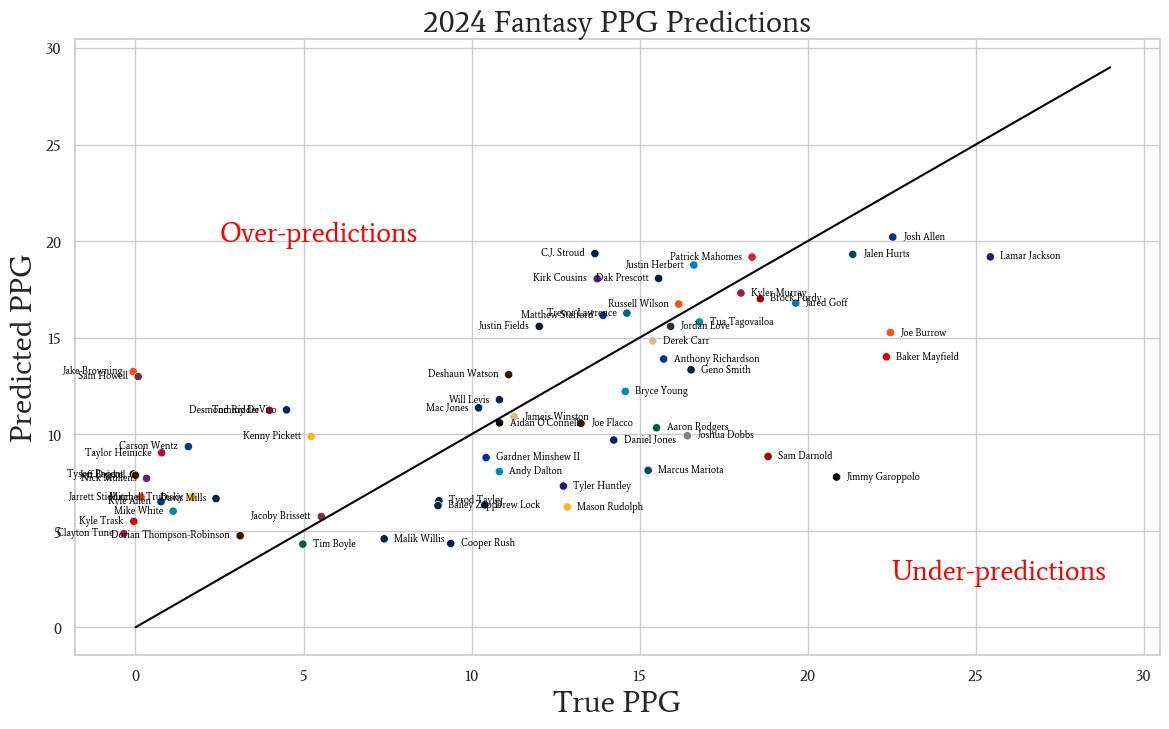

In [51]:
# plot 2024 predictions
plot_2024_preds(qb_preds)

# 2025 Predictions